In [1]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import os

In [2]:
def load_imgs(path, mode="RGB"):
    return [Image.open(os.path.join(path,  file)).convert(mode) for file in sorted(os.listdir(path))]

In [21]:
def img_to_imgs(img_size, masks_folder, image_folder, save_folder):
    mask_imgs = load_imgs(masks_folder, mode="RGB")
    bear_imgs = load_imgs(image_folder, mode="RGB")
    k = 0
    for idx in tqdm(range(len(mask_imgs))):
        x_bordercount = mask_imgs[idx].size[0] // img_size
        y_bordercount = mask_imgs[idx].size[1] // img_size
        for i in range(x_bordercount):
            for j in range(y_bordercount):
                left = i * img_size
                top = j * img_size
                right = min(mask_imgs[idx].size[0], (i + 1) * img_size)
                bottom = min(mask_imgs[idx].size[1], (j + 1) * img_size)
                coords = (left, top, right, bottom)
                frame_mask = mask_imgs[idx].crop(coords)
                os.makedirs(os.path.join(save_folder, "bears"), exist_ok=True)
                os.makedirs(os.path.join(save_folder, "masks"), exist_ok=True)
                if (np.array(frame_mask) != 0).sum():
                    frame_bear = bear_imgs[idx].crop((left, top, right, bottom))
                    frame_bear.save(os.path.join(save_folder, "bears", f"{k}.PNG"))
                    frame_mask.save(os.path.join(save_folder, "masks", f"{k}.PNG"))
                    k += 1

In [22]:
img_to_imgs(1280, '../input/polarbears/arctic_with_bears/masks', '../input/polarbears/arctic_with_bears/bears', './1280px')

100%|██████████| 35/35 [00:37<00:00,  1.07s/it]


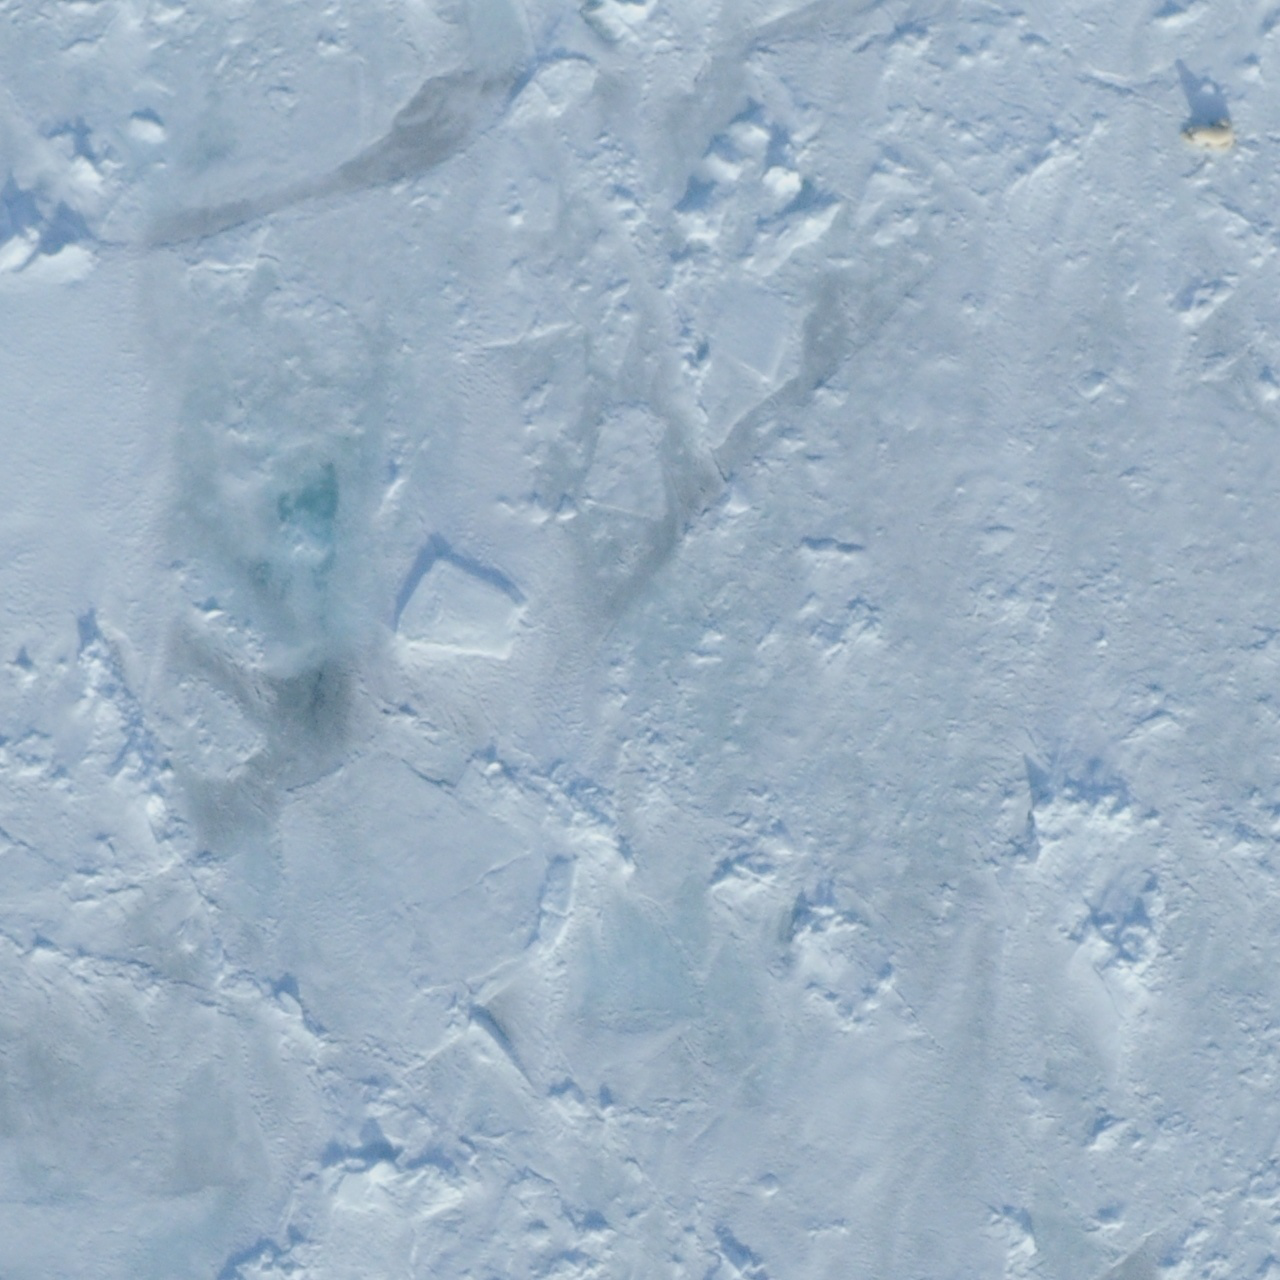

In [24]:
Image.open('./1280px/bears/0.PNG')

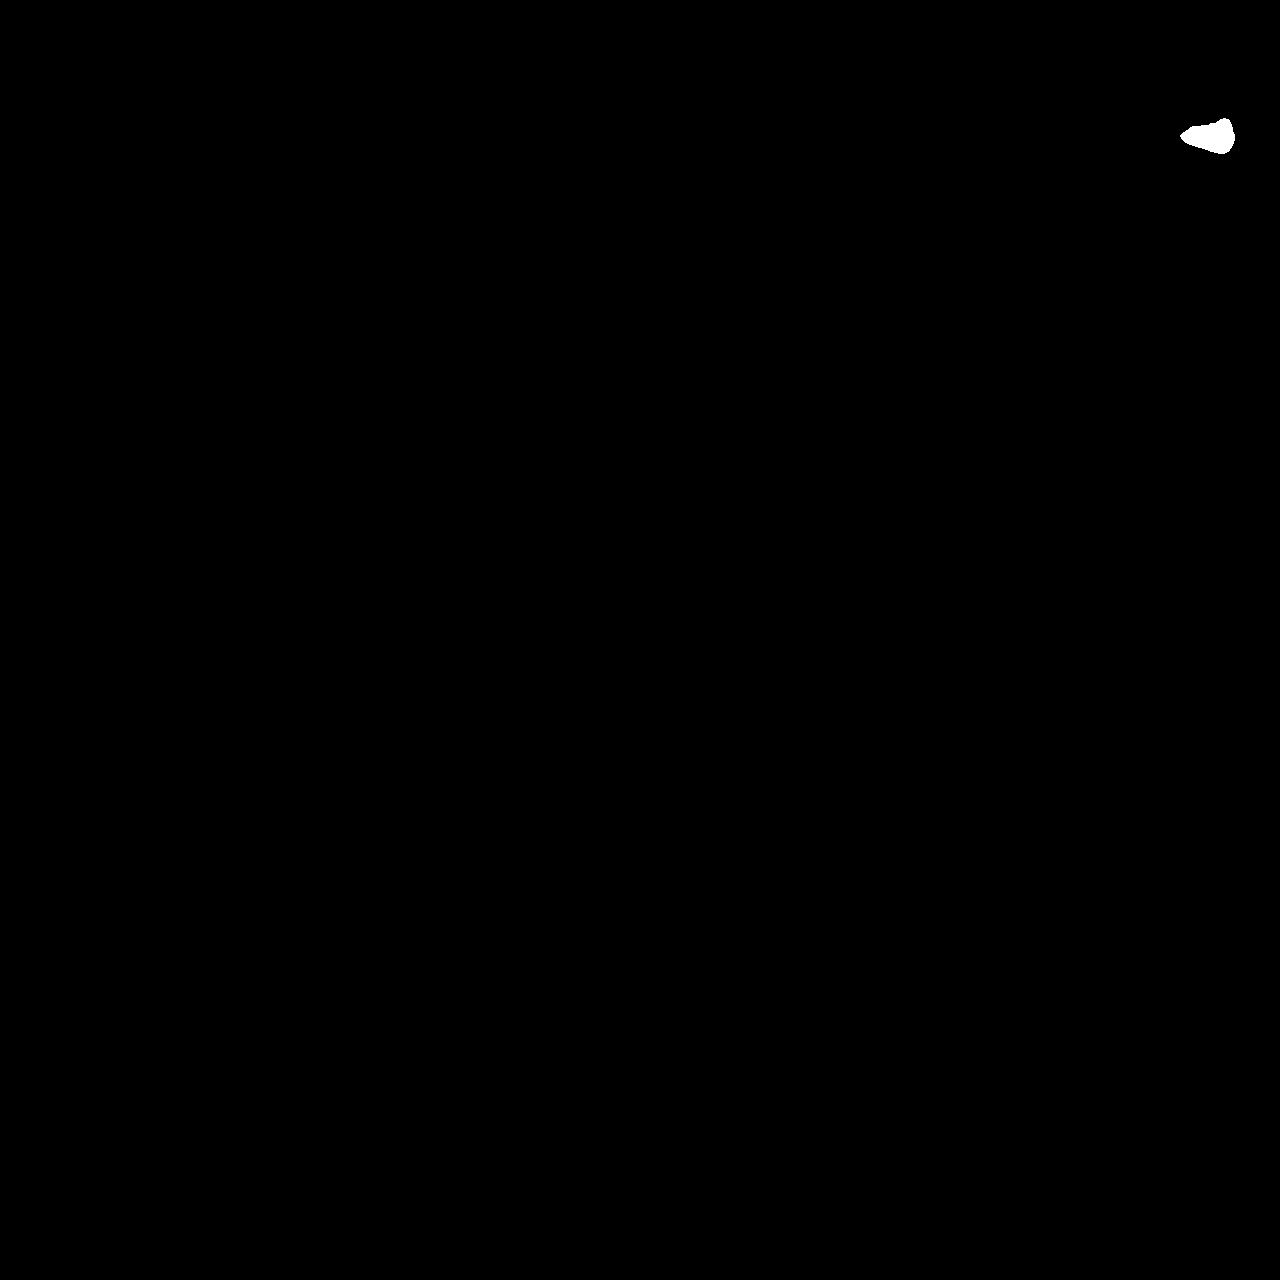

In [25]:
Image.open('./1280px/masks/0.PNG')

In [26]:
len(os.listdir('./1280px/bears/'))

38